# Práctica 1.2 - CNNs

Nombre 1: Guillermo Garcia Engelmo

Nombre 2: Antonio Serrano Rodriguez

Grupo: AP.12.04

## Preprocesado del dataset

In [1]:
import keras
from keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf

# Cargar el conjunto de datos de Keras
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalizar los valores de las imágenes
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Realizar la codificación one-hot de las etiquetas
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=69)

# Data Augmentation 
data_augmentation = keras.Sequential(

    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]

)

# Otras funciones necesarias
def plot(train, validation, title):

    '''función para mostrar  gráficas'''

    plt.clf()
    epochs = range(1, len(train) + 1)
    plt.plot(epochs, train, 'b-o', label='Training ' + title)
    plt.plot(epochs, validation, 'r--', label='Validation '+ title)

    plt.title('Training and validation ' + title)
    plt.xlabel('Epochs')
    plt.ylabel(title)
    plt.legend()
    plt.show()

def printModel(model, history):

    """Ver resultados"""

    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f'Pérdida en el conjunto de prueba: {test_loss}')
    print(f'Precisión en el conjunto de prueba: {test_accuracy}')

    history_dict = history.history
    history_dict.keys()
    print(history.history.keys())  # Para confirmar las claves disponibles

    plot(history_dict['loss'], history_dict['val_loss'], 'loss')
    plot(history_dict['accuracy'], history_dict['val_accuracy'], 'accuracy')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


## 1. Búsqueda de la complejidad del modelo base 

En este apartado, buscamos definir una arquitectura base sobre la cual aplicaremos diferentes estrategias de regularización y optimización. Hemos centrado nuestro análisis en el número de capas convolucionales y de agrupamiento, evaluando cómo afectan al rendimiento del modelo. Al aumentar progresivamente el número de capas convolucionales, hemos tratado de lograr un equilibrio: buscamos que el modelo sea capaz de extraer suficientes características relevantes y conseguir un cierto sobreajuste para mejorar los resultados empleando técnicas de regularización.

Nuestra estrategia ha consistido en añadir varias capas convolucionales seguidas, que aumentan la capacidad de extracción de características, y luego introducir una capa de agrupamiento (pooling). Esto último ayuda a reducir la dimensionalidad y a disminuir la sensibilidad a pequeñas variaciones en la posición de las características, además de controlar la complejidad y reducir el riesgo de sobreajuste. En este sentido, evaluamos cómo el cambio en la profundidad del modelo y la combinación de capas convolucionales y de agrupamiento afectan tanto al aprendizaje de características como a la generalización en datos nuevos.

### 1.1 Modelo 1

En esta primera aproximación, hemos definido un modelo sencillo que emplea un total de tres capas convolucionales y dos de agrupamiento (MaxPooling).

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        32,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,026 (617.29 KB)

 Trainable params: 158,026 (617.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


I0000 00:00:1731005809.424996      98 service.cc:145] XLA service 0x7fb6700060a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731005809.425042      98 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1731005809.425047      98 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  44/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1276 - loss: 2.2963

I0000 00:00:1731005812.283961      98 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3762 - loss: 1.7060 - val_accuracy: 0.5747 - val_loss: 1.2359
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6143 - loss: 1.1163 - val_accuracy: 0.6577 - val_loss: 1.0023
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6861 - loss: 0.9147 - val_accuracy: 0.6837 - val_loss: 0.9323
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7204 - loss: 0.8084 - val_accuracy: 0.6844 - val_loss: 0.9470
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7592 - loss: 0.6994 - val_accuracy: 0.6979 - val_loss: 0.9150
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7829 - loss: 0.6335 - val_accuracy: 0.6919 - val_loss: 0.9514
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8030 - loss: 0.5748 - val_accuracy: 0.6909 - val_loss: 0.9256
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8171 - loss: 0.5227 - val_accura

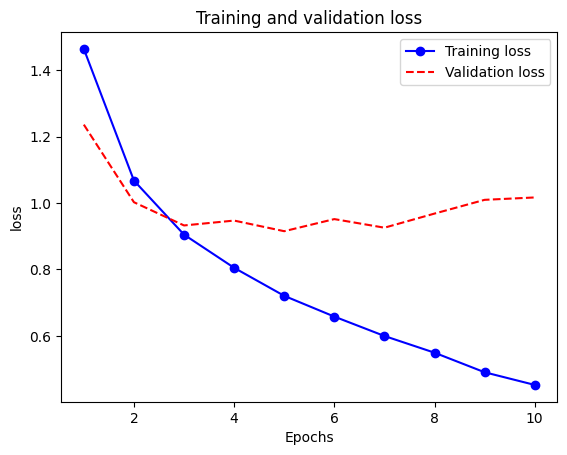

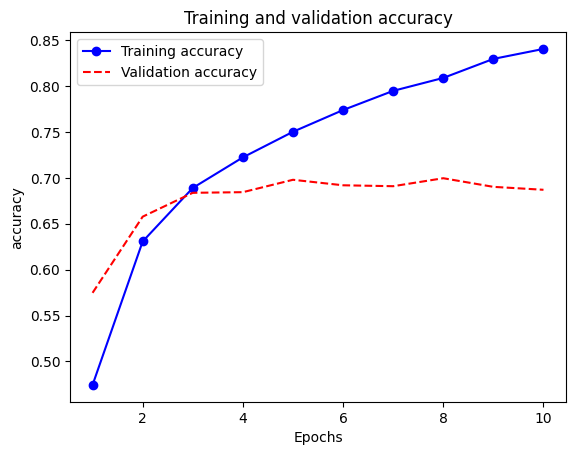

In [2]:
inputs = keras.Input(shape=(32, 32, 3)) # imagenes de 32x32 en rgb

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=5, activation="relu")(x)

x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)

x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Flatten()(x) 

outputs = layers.Dense(10, activation="softmax")(x) 

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="categorical_crossentropy",

              optimizer="adam",

              metrics=["accuracy"])

model.summary()

early_stopping = keras.callbacks.EarlyStopping(

    monitor="val_loss",

    mode="min",

    patience=5,

    restore_best_weights = True # al parar devolverá el que lo ha hecho mejor hasta el momento

)

history = model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val), callbacks=[early_stopping])

printModel(model, history)

Podemos observar que el sobreajuste ocurre rápidamente. Además, los resultados obtenidos, tanto en test_accuracy (0.70) como en test_loss   (0.42), no son satisfactorios. La precisión en el conjunto de entrenamiento (0.85) también es relativamente baja, y dado que vamos a emplear técnicas de regularización, es probable que esta disminuya aún más, lo que podría impedir mejoras significativas en las métricas sobre el conjunto de test.

### 1.2 Modelo 2

Esta segunda aproximación es una versión más compleja al implementar un total de cinco capas de convolución y dos de pooling. Además, empleamos Batch Normalization para un entrenamiento más robusto.

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 26, 26, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 13, 13, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 13, 13, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        92,170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 663,370 (2.53 MB)

 Trainable params: 662,154 (2.53 MB)

 Non-trainable params: 1,216 (4.75 KB)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.4273 - loss: 1.8104 - val_accuracy: 0.5619 - val_loss: 1.2972
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.6767 - loss: 0.9406 - val_accuracy: 0.6608 - val_loss: 1.0051
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.7479 - loss: 0.7323 - val_accuracy: 0.7153 - val_loss: 0.8322
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.7918 - loss: 0.6064 - val_accuracy: 0.6988 - val_loss: 0.9332
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.8305 - loss: 0.4862 - val_accuracy: 0.7145 - val_loss: 0.8479
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.8656 - loss: 0.3913 - val_accuracy: 0.7704 - val_loss: 0.7201
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.8968 - loss: 0.2936 - val_accuracy: 0.7621 - val_loss: 0.7702
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9311 -

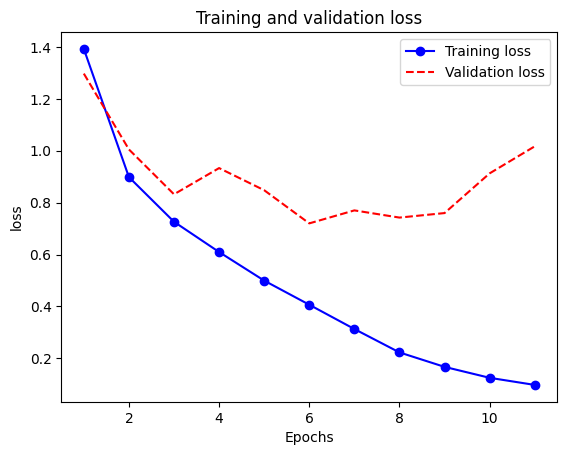

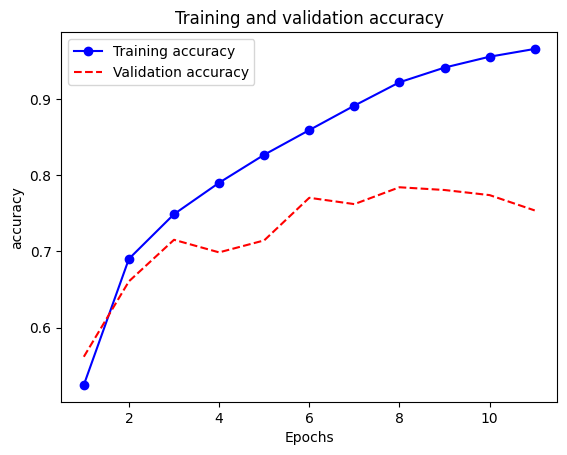

In [3]:
inputs = keras.Input(shape=(32, 32, 3)) 

x = layers.Conv2D(filters=32, kernel_size=3, padding="valid")(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=64, kernel_size=5, padding="valid")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=128, kernel_size=3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=256, kernel_size=3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Flatten()(x)

early_stopping = keras.callbacks.EarlyStopping(

    monitor="val_loss",

    mode="min",

    patience=5,

    restore_best_weights = True

)

outputs = layers.Dense(10, activation="softmax")(x) 

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="categorical_crossentropy",

              optimizer="adam",

              metrics=["accuracy"])

model.summary()

history = model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val), callbacks=[early_stopping])

printModel(model, history)

Este modelo ha sobreajustado rapidamente, en tan solo 11 epochs ya ha alcanzado un 0.97 de train accuracy y el validation accuracy se queda alrededor del 0.77. Esto puede deberse a que el modelo sigue siendo demasiado sencillo para el problema que queremos resolver.

### 1.3 Modelo 3

Por último, aumentamos más la complejidad con la intención de mejorar los resultados obtenidos con el modelo anterior. En este caso, hemos añadido un total de siete capas convoluciones y dos capas de pooling.

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 26, 26, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 13, 13, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 13, 13, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 13, 13, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 13, 13, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 13, 13, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 13, 13, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 13, 13, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 13, 13, 256)    │         1,02

 Total params: 1,371,338 (5.23 MB)

 Trainable params: 1,369,354 (5.22 MB)

 Non-trainable params: 1,984 (7.75 KB)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.3743 - loss: 2.0563 - val_accuracy: 0.5566 - val_loss: 1.2782
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.6416 - loss: 1.0185 - val_accuracy: 0.5315 - val_loss: 1.4119
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.7299 - loss: 0.7737 - val_accuracy: 0.5325 - val_loss: 1.3795
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.7731 - loss: 0.6546 - val_accuracy: 0.7345 - val_loss: 0.7625
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.8152 - loss: 0.5338 - val_accuracy: 0.7184 - val_loss: 0.8323
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.8462 - loss: 0.4466 - val_accuracy: 0.7806 - val_loss: 0.6391
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.8752 - loss: 0.3659 - val_accuracy: 0.7826 - val_loss: 0.6526
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.8972 -

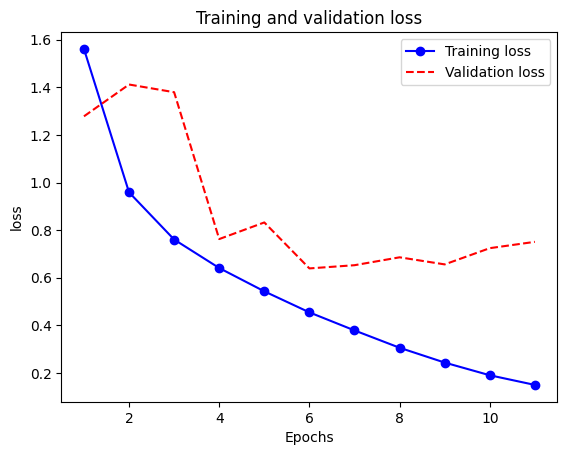

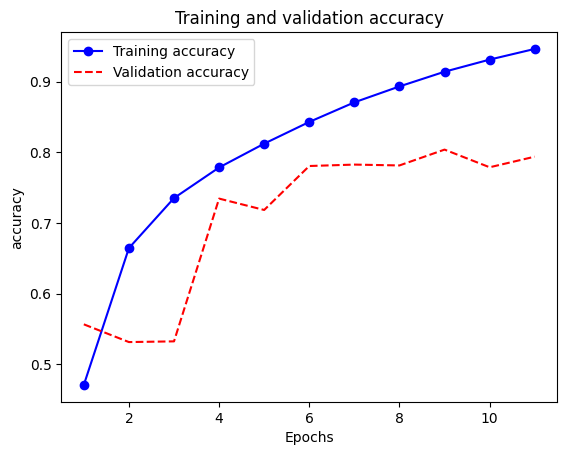

In [4]:
inputs = keras.Input(shape=(32, 32, 3)) 

x = layers.Conv2D(filters=32, kernel_size=5, padding="valid")(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=64, kernel_size=3, padding="valid")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=128, kernel_size=3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=128, kernel_size=3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=256, kernel_size=3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=256, kernel_size=3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Flatten()(x) 

early_stopping = keras.callbacks.EarlyStopping(

    monitor="val_loss",

    mode="min",

    patience=5,

    restore_best_weights = True

)


outputs = layers.Dense(10, activation="softmax")(x) 

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="categorical_crossentropy",

              optimizer="adam",

              metrics=["accuracy"])

model.summary()

history = model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val), callbacks=[early_stopping])

printModel(model, history)

Este modelo, ya más complejo, da resultados decentes alcanzando un 0.78 de accuracy en test. Consideramos que el modelo ya tiene la complejidad necesaria para abordar el problema. Por tanto, de los tres modelos entrenados hasta ahora usaremos este como base para probar distintas medidas de regularización y evitar el sobreajuste consiguiendo mejores modelos.

## 2. Regularización

### 2.1 Modelo 3 + DA

Como primera medida de regularización a probar hemos decidido empezar usando Data Augmentation por su sencilla implementación y la posibilidad de que mejore el modelo.

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 26, 26, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 26, 26, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 26, 26, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 13, 13, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 13, 13, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 13, 13, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 13, 13, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 13, 13, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 13, 13, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 13, 13, 256)    │       590,08

 Total params: 1,371,338 (5.23 MB)

 Trainable params: 1,369,354 (5.22 MB)

 Non-trainable params: 1,984 (7.75 KB)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.3279 - loss: 2.2225 - val_accuracy: 0.4541 - val_loss: 1.5526
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.5060 - loss: 1.3820 - val_accuracy: 0.5079 - val_loss: 1.4401
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.5797 - loss: 1.1820 - val_accuracy: 0.6027 - val_loss: 1.1017
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.6381 - loss: 1.0380 - val_accuracy: 0.6238 - val_loss: 1.1586
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.6769 - loss: 0.9370 - val_accuracy: 0.6808 - val_loss: 0.9491
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.7030 - loss: 0.8573 - val_accuracy: 0.7270 - val_loss: 0.8002
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.7265 - loss: 0.7953 - val_accuracy: 0.7334 - val_loss: 0.8019
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.7394 -

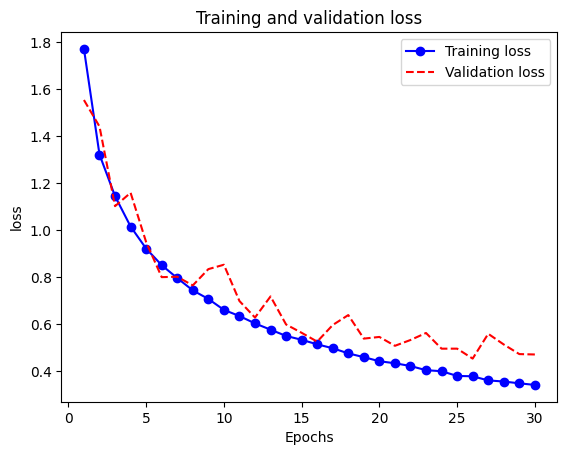

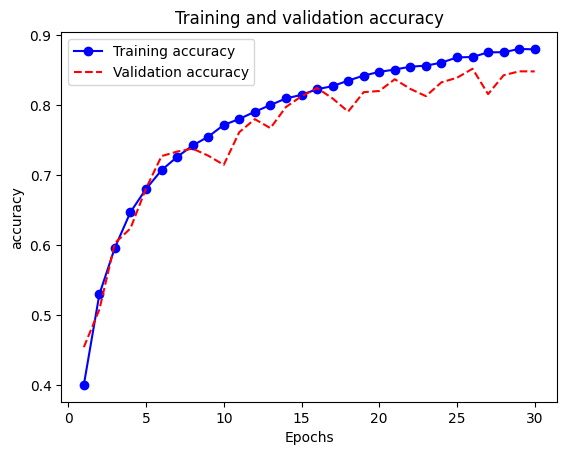

In [5]:
inputs = keras.Input(shape=(32, 32, 3)) # imagenes de 32x32 en rgb

x = data_augmentation(inputs) # Esta línea implementa data augmentation a partir de lo especificado en la primera celda

x = layers.Conv2D(filters=32, kernel_size=5, padding="valid")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=64, kernel_size=3, padding="valid")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=128, kernel_size=3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=128, kernel_size=3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=256, kernel_size=3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=256, kernel_size=3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Flatten()(x)

early_stopping = keras.callbacks.EarlyStopping(

    monitor="val_loss",

    mode="min",

    patience=5,

    restore_best_weights = True

)

outputs = layers.Dense(10, activation="softmax")(x) 

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="categorical_crossentropy",

              optimizer="adam",

              metrics=["accuracy"])

model.summary()

history = model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val), callbacks=[early_stopping])

printModel(model, history)

Como hemos comprobado, el data augmentation ha mejorado significativamente el modelo. Este, al ampliar el dataset con nuevas imagenes (alteraciones de las anteriores), ha permitido al modelo entrenarse con muchas más imagenes, al ser más, al modelo le cuesta más sobreentrenarse y memorizar el dataset. Por esto es que se ha notado una mejora tan notoria (0.77 -> 0.84 de test accuracy).

Como el data augmentation ha mejorado tanto el modelo base y no ha alterado la estructura por simplemente ampliar el tamaño del dataset, hemos decidido utilizarlo en el resto de modelos.

## 2.2 Modelo 3 + DA + kernels

Los kernels son el tamaño de los filtros aplicados en las convoluciones, hasta ahora solo hemos usado kernels de tamaño 3 o 5 siguiendo ya que nos hemos basado en los diseños de redes convoluciones VGG (filtros pequeños y maxpooling de 2). Pero esta vez vamos a probar a cambiar el tamaño de los kernels para ver si mejora.

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 26, 26, 32)     │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_33 (Activation)      │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 20, 20, 64)     │       100,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 20, 20, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_34 (Activation)      │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 20, 20, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 20, 20, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_35 (Activation)      │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 10, 10, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 10, 10, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_36 (Activation)      │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 10, 10, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 10, 10, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_37 (Activation)      │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 10, 10, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_38 (Activation)      │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 10, 10, 256)    │       590,08

 Total params: 2,082,762 (7.95 MB)

 Trainable params: 2,080,778 (7.94 MB)

 Non-trainable params: 1,984 (7.75 KB)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 0.2197 - loss: 2.6024 - val_accuracy: 0.2943 - val_loss: 2.0366
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.3747 - loss: 1.7701 - val_accuracy: 0.3990 - val_loss: 1.8632
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 21ms/step - accuracy: 0.4380 - loss: 1.5467 - val_accuracy: 0.4829 - val_loss: 1.4332
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 21ms/step - accuracy: 0.4864 - loss: 1.4340 - val_accuracy: 0.4879 - val_loss: 1.4451
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.5202 - loss: 1.3344 - val_accuracy: 0.5089 - val_loss: 1.4043
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 21ms/step - accuracy: 0.5522 - loss: 1.2525 - val_accuracy: 0.5533 - val_loss: 1.3076
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 21ms/step - accuracy: 0.5876 - loss: 1.1705 - val_accuracy: 0.5730 - val_loss: 1.2222
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 21ms/step - accuracy: 0.6093 -

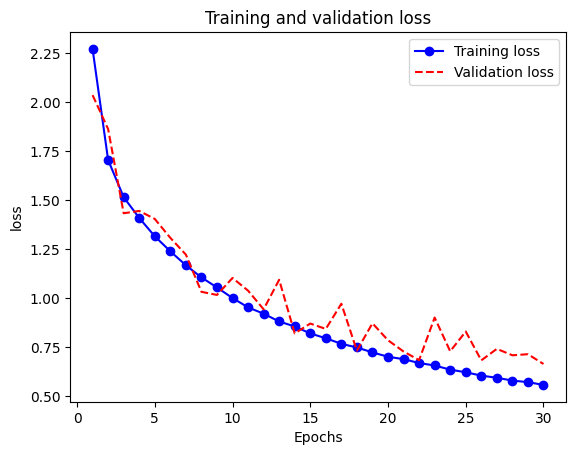

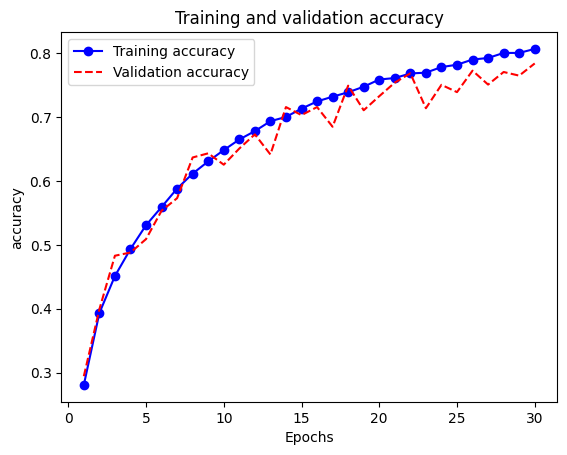

In [9]:
inputs = keras.Input(shape=(32, 32, 3)) 

x = data_augmentation(inputs)

x = layers.Conv2D(filters=32, kernel_size=7, padding="valid")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=64, kernel_size=7, padding="valid")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=128, kernel_size=5, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=5, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=128, kernel_size=5, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=256, kernel_size=3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=256, kernel_size=3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Flatten()(x)


early_stopping = keras.callbacks.EarlyStopping(

    monitor="val_loss",

    mode="min",

    patience=7,

    restore_best_weights = True

)

outputs = layers.Dense(10, activation="softmax")(x) 

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="categorical_crossentropy",

              optimizer="adam",

              metrics=["accuracy"])

model.summary()


history = model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val), callbacks=[early_stopping])

printModel(model, history)

Como podemos observar, el test accuracy de 0.77 no ha mejorado, pero es que también los parámetros de la red han aumentado a 2 millones. Esto se debe a que las primeras convoluciones hemos usado un kernel de 7, este es equivalente ha hacer 3 convoluciones de 3x3 y sin no-linealidades intermedias. Por tanto era esperable una bajada de su rendimiento, pero si no ha sido tan pronunciada fue por establecer las mismas convoluciones pero con diferentes filtros, esto ha provocado que el modelo sea más complejo y tenga mayor capacidad de aprendizaje. Esto puede ser un indicio de que el modelo podría funcionar mejor con mayor complejidad, pero esto lo exploraremos más adelante.

## 2.3 Modelo 3 + DA + maxPool

Las capas de MaxPooling reducen los parámetros del modelo al reducir la imagen haciendo un resumen de los pixeles cercanos, concretamente escogiendo el valor máximo como representante. Vamos a comprobar que pasa si introducimos un maxPooling(2) más.

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 13, 13, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 6, 6, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 6, 6, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 6, 6, 256)      │             

 Total params: 1,302,218 (4.97 MB)

 Trainable params: 1,300,234 (4.96 MB)

 Non-trainable params: 1,984 (7.75 KB)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.3453 - loss: 1.9947 - val_accuracy: 0.4849 - val_loss: 1.4748
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.5160 - loss: 1.3810 - val_accuracy: 0.5962 - val_loss: 1.1661
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.6005 - loss: 1.1458 - val_accuracy: 0.6351 - val_loss: 1.0952
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.6472 - loss: 1.0077 - val_accuracy: 0.6700 - val_loss: 0.9601
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.6844 - loss: 0.8988 - val_accuracy: 0.7182 - val_loss: 0.8162
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.7146 - loss: 0.8195 - val_accuracy: 0.6993 - val_loss: 0.9073
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.7315 - loss: 0.7735 - val_accuracy: 0.7466 - val_loss: 0.7499
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.7440 -

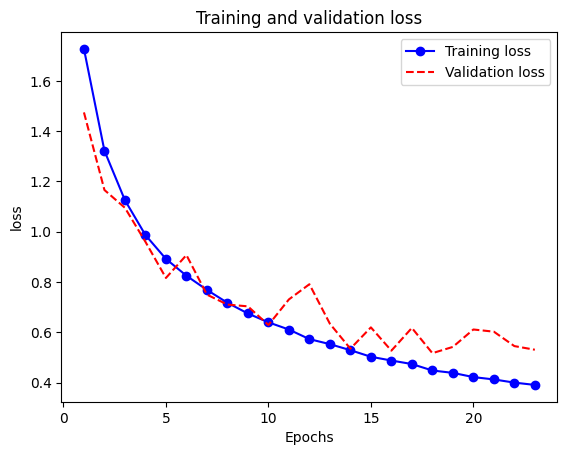

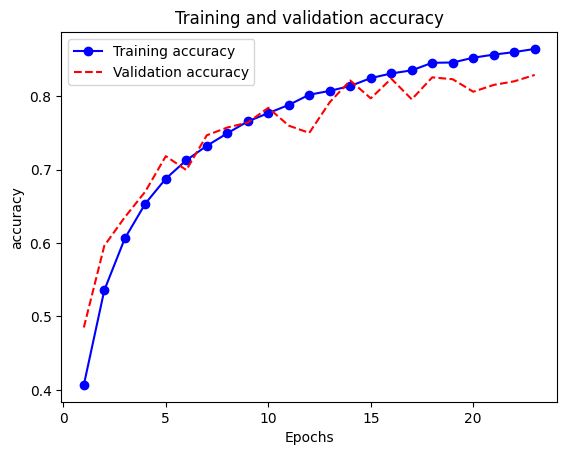

In [2]:
inputs = keras.Input(shape=(32, 32, 3)) # imagenes de 32x32 en rgb

x = data_augmentation(inputs)

x = layers.Conv2D(filters=32, kernel_size=5, padding="valid")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=64, kernel_size=3, padding="valid")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=128, kernel_size=3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=256, kernel_size=3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=256, kernel_size=3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Flatten()(x) # Necesaria para pasarle a la red neuronal densa

early_stopping = keras.callbacks.EarlyStopping(

    monitor="val_loss",

    mode="min",

    patience=5,

    restore_best_weights = True

)

outputs = layers.Dense(10, activation="softmax")(x) 

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="categorical_crossentropy",

              optimizer="adam",

              metrics=["accuracy"])

model.summary()

history = model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val), callbacks=[early_stopping])

printModel(model, history)

El modelo ha empeorado ligeramente (0,02 menos de accuracy). Esto tiene sentido ya que al reducir la imagen usando MaxPooling se pierde información a cambio de una reducción de parámetros. Generalmente, el maxpooling se suele usar después de cada convolución o X convoluciones para  mantener un número de parámetros bajo y así poder usar más convoluciones. Si en esta prática hemos decidido para el resto de modelos solo usar maxpooling dos veces es debido a que las imágenes son bastante pequeñas(32x32) y se reducirían mucho como para poder hacer convoluciones y predicciones precisas.

## 2.4 Modelo 3 + DA + complejidad

Como se ha comentado en el apartado de prueba de distintos tamaños de kernel, creemos que el modelo base podría necesitar una mayor complejidad para aumentar su capacidad de clasificado de imágenes. Por tanto vamos a probar a añadirle una convolución más de 512 filtros.

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_47 (Activation)      │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 26, 26, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_48          │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_48 (Activation)      │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 26, 26, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_49          │ (None, 26, 26, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_49 (Activation)      │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 13, 13, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_50          │ (None, 13, 13, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_50 (Activation)      │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 13, 13, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_51          │ (None, 13, 13, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_51 (Activation)      │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 13, 13, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_52          │ (None, 13, 13, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_52 (Activation)      │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 13, 13, 256)    │       590,08

 Total params: 2,645,706 (10.09 MB)

 Trainable params: 2,642,698 (10.08 MB)

 Non-trainable params: 3,008 (11.75 KB)

Epoch 1/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 49s 35ms/step - accuracy: 0.2856 - loss: 2.5912 - val_accuracy: 0.3450 - val_loss: 2.0398
Epoch 2/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 34ms/step - accuracy: 0.4750 - loss: 1.4605 - val_accuracy: 0.5334 - val_loss: 1.3540
Epoch 3/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 34ms/step - accuracy: 0.5564 - loss: 1.2583 - val_accuracy: 0.5790 - val_loss: 1.1949
Epoch 4/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 34ms/step - accuracy: 0.6129 - loss: 1.1002 - val_accuracy: 0.6457 - val_loss: 1.0338
Epoch 5/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 34ms/step - accuracy: 0.6588 - loss: 0.9796 - val_accuracy: 0.6478 - val_loss: 1.0434
Epoch 6/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 34ms/step - accuracy: 0.6873 - loss: 0.8999 - val_accuracy: 0.6748 - val_loss: 0.9689
Epoch 7/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 34ms/step - accuracy: 0.7118 - loss: 0.8281 - val_accuracy: 0.7317 - val_loss: 0.7935
Epoch 8/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 34ms/step - accuracy: 0.7304 -

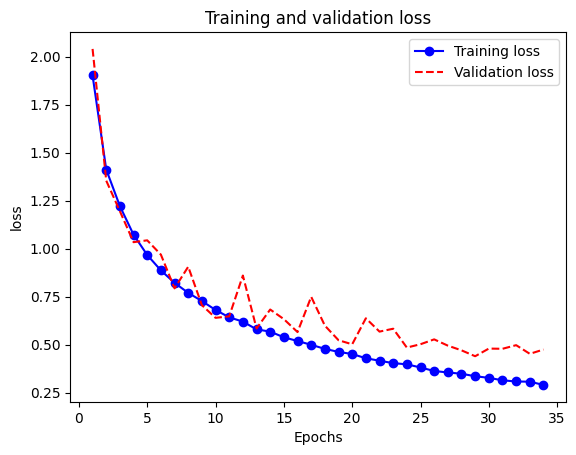

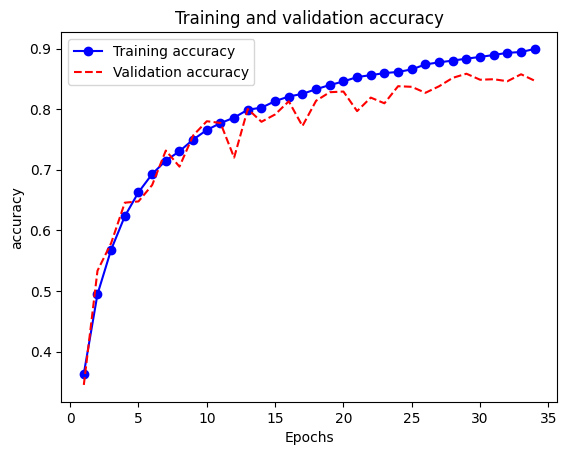

In [11]:
inputs = keras.Input(shape=(32, 32, 3)) 

x = data_augmentation(inputs)

x = layers.Conv2D(filters=32, kernel_size=5, padding="valid")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=64, kernel_size=3, padding="valid")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=128, kernel_size=3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=128, kernel_size=3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=256, kernel_size=3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=256, kernel_size=3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=512, kernel_size=3, padding="same")(x) # Se han duplicado los parámetros
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Flatten()(x) # Necesaria para pasarle a la red neuronal densa

early_stopping = keras.callbacks.EarlyStopping(

    monitor="val_loss",

    mode="min",

    patience=5,

    restore_best_weights = True

)


outputs = layers.Dense(10, activation="softmax")(x) 

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="categorical_crossentropy",

              optimizer="adam",

              metrics=["accuracy"])

model.summary()


history = model.fit(x_train, y_train, epochs=40, validation_data=(x_val, y_val), callbacks=[early_stopping])

printModel(model, history)

Ha mejorado muy ligeramente el redimiento del modelo base con DA. El aplicar la convolución extra nos ha duplicado los parámetros del modelo llevando a que tarde mucho más en ejecutar, pero visto que el rendimiento ha sido el mismo, creemos que usar medidas de regularización con este último podría mejorar significativamente el rendimiento del modelo.

## 2.5 Modelo 3 + DA + complejidad + dynamic learning rate

En lugar de probar con distintos optimizadores, creemos que sería mejor cambiar el learning rate dinámicamente porque vemos bastantes picos tanto en accuracy como en el loss validation y un learning rate dinámico que cada diez epochs se reduzca a la mitad podría ayudar a aumentar su velocidad de convergencia una vez se encuentre cerca del punto óptimo.

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_55          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_55 (Activation)      │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 26, 26, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_56          │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_56 (Activation)      │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 26, 26, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_57          │ (None, 26, 26, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_57 (Activation)      │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 13, 13, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_58          │ (None, 13, 13, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_58 (Activation)      │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 13, 13, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_59          │ (None, 13, 13, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_59 (Activation)      │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 13, 13, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_60          │ (None, 13, 13, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_60 (Activation)      │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_64 (Conv2D)              │ (None, 13, 13, 256)    │       590,08

 Total params: 2,645,706 (10.09 MB)

 Trainable params: 2,642,698 (10.08 MB)

 Non-trainable params: 3,008 (11.75 KB)

Epoch 1/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 48s 35ms/step - accuracy: 0.2646 - loss: 2.9103 - val_accuracy: 0.4060 - val_loss: 1.6320 - learning_rate: 0.0010
Epoch 2/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.4540 - loss: 1.5216 - val_accuracy: 0.4443 - val_loss: 1.6542 - learning_rate: 0.0010
Epoch 3/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 34ms/step - accuracy: 0.5237 - loss: 1.3324 - val_accuracy: 0.4797 - val_loss: 1.6627 - learning_rate: 0.0010
Epoch 4/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.5796 - loss: 1.1908 - val_accuracy: 0.6051 - val_loss: 1.2220 - learning_rate: 0.0010
Epoch 5/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.6302 - loss: 1.0516 - val_accuracy: 0.6775 - val_loss: 0.9327 - learning_rate: 0.0010
Epoch 6/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 34ms/step - accuracy: 0.6701 - loss: 0.9435 - val_accuracy: 0.6622 - val_loss: 1.0335 - learning_rate: 0.0010
Epoch 7/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 34ms/step - accura

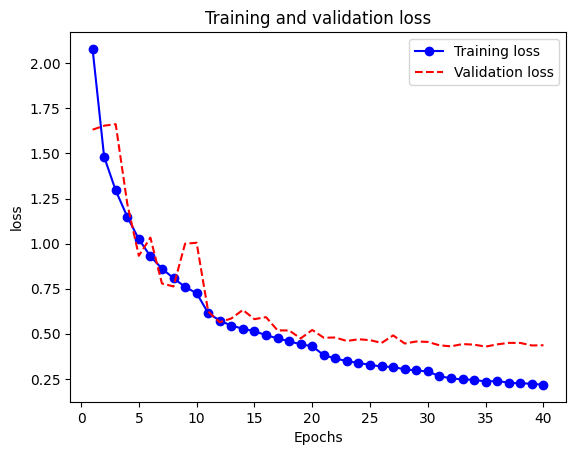

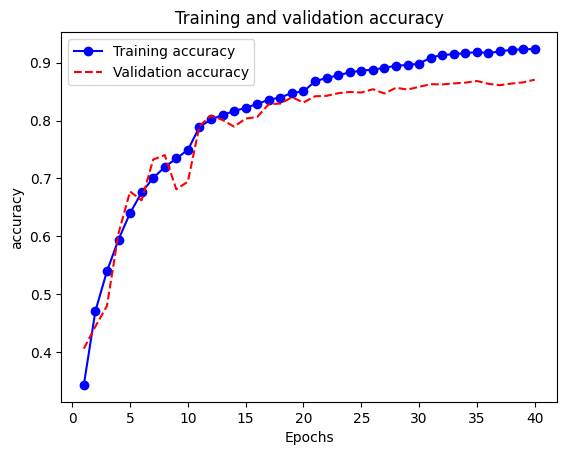

In [12]:
# con tasa de aprendizaje dinámica

import tensorflow as tf

from tensorflow.keras.callbacks import LearningRateScheduler



# Definir una función de ajuste de la tasa de aprendizaje

def scheduler(epoch, lr):

    # Reduce la tasa de aprendizaje a la mitad cada 10 epochs

    if epoch % 10 == 0 and epoch != 0:

        return lr * 0.5

    return lr


# Crear el callback

lr_scheduler = LearningRateScheduler(scheduler)

inputs = keras.Input(shape=(32, 32, 3)) # imagenes de 32x32 en rgb

x = data_augmentation(inputs) # Esta línea implementa data augmentation a partir de la función de arriba

x = layers.Conv2D(filters=32, kernel_size=5, padding="valid")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=64, kernel_size=3, padding="valid")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=128, kernel_size=3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=128, kernel_size=3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=256, kernel_size=3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=256, kernel_size=3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=512, kernel_size=3, padding="same")(x) # Se han duplicado los parámetros
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Flatten()(x) # Necesaria para pasarle a la red neuronal densa

early_stopping = keras.callbacks.EarlyStopping(

    monitor="val_loss",

    mode="min",

    patience=5,

    restore_best_weights = True

)


outputs = layers.Dense(10, activation="softmax")(x) 
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="categorical_crossentropy",

              optimizer="adam",

              metrics=["accuracy"])

model.summary()

history = model.fit(x_train, y_train, epochs=40, validation_data=(x_val, y_val), callbacks=[early_stopping, lr_scheduler])

printModel(model, history)

El dynamic learning rate ha mejorado bastante el modelo subiendo su accuracy a 0.86 y reduciendo su loss 0.44.


## 2.6 Modelo 3 + DA + complejidad + dynamic learning rate + dropout

Creemos que puede seguir sobrentrenando así que aplicaremos un dropout después de flatten (así no entra en conflicto con batch normalization) para evitar un posible sobrentrenamiendo debido a la alta complejidad del modelo.

Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_66 (Conv2D)              │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_63          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_63 (Activation)      │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_67 (Conv2D)              │ (None, 26, 26, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_64          │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_64 (Activation)      │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_68 (Conv2D)              │ (None, 26, 26, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_65          │ (None, 26, 26, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_65 (Activation)      │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_69 (Conv2D)              │ (None, 13, 13, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_66          │ (None, 13, 13, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_66 (Activation)      │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_70 (Conv2D)              │ (None, 13, 13, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_67          │ (None, 13, 13, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_67 (Activation)      │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_71 (Conv2D)              │ (None, 13, 13, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_68          │ (None, 13, 13, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_68 (Activation)      │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_72 (Conv2D)              │ (None, 13, 13, 256)    │       590,08

 Total params: 2,645,706 (10.09 MB)

 Trainable params: 2,642,698 (10.08 MB)

 Non-trainable params: 3,008 (11.75 KB)

Epoch 1/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 49s 35ms/step - accuracy: 0.2884 - loss: 2.8313 - val_accuracy: 0.4320 - val_loss: 1.5697 - learning_rate: 0.0010
Epoch 2/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.4571 - loss: 1.5055 - val_accuracy: 0.4734 - val_loss: 1.5752 - learning_rate: 0.0010
Epoch 3/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.5311 - loss: 1.3245 - val_accuracy: 0.5699 - val_loss: 1.2248 - learning_rate: 0.0010
Epoch 4/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.5868 - loss: 1.1676 - val_accuracy: 0.6124 - val_loss: 1.1370 - learning_rate: 0.0010
Epoch 5/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.6315 - loss: 1.0515 - val_accuracy: 0.6753 - val_loss: 0.9497 - learning_rate: 0.0010
Epoch 6/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.6606 - loss: 0.9720 - val_accuracy: 0.6685 - val_loss: 0.9970 - learning_rate: 0.0010
Epoch 7/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accura

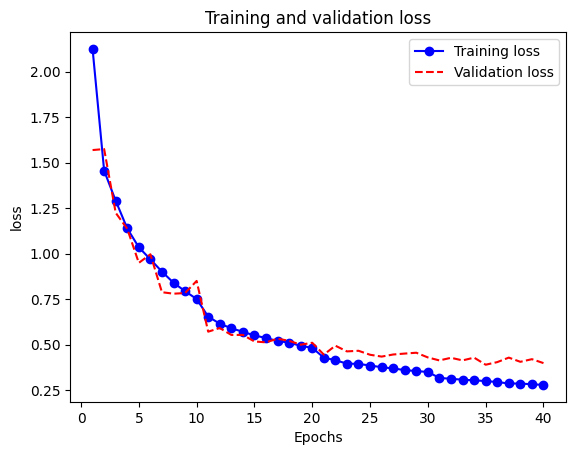

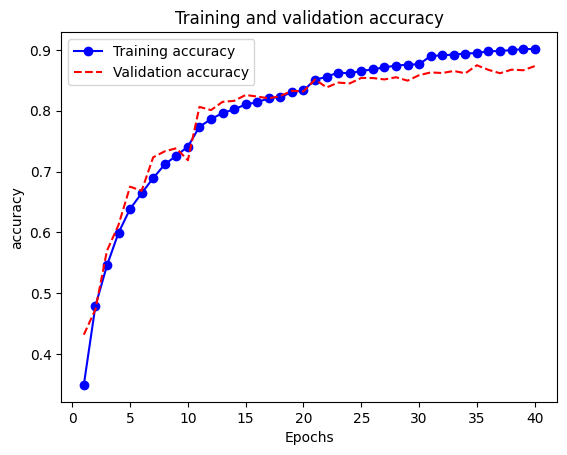

In [13]:
import tensorflow as tf

from tensorflow.keras.callbacks import LearningRateScheduler



# Definir una función de ajuste de la tasa de aprendizaje

def scheduler(epoch, lr):

    # Reduce la tasa de aprendizaje a la mitad cada 10 epochs

    if epoch % 10 == 0 and epoch != 0:

        return lr * 0.5

    return lr

# Crear el callback

lr_scheduler = LearningRateScheduler(scheduler)

inputs = keras.Input(shape=(32, 32, 3)) # imagenes de 32x32 en rgb

x = data_augmentation(inputs) # Esta línea implementa data augmentation a partir de la función de arriba

x = layers.Conv2D(filters=32, kernel_size=5, padding="valid")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=64, kernel_size=3, padding="valid")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=128, kernel_size=3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=128, kernel_size=3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=256, kernel_size=3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=256, kernel_size=3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(filters=512, kernel_size=3, padding="same")(x) # Se han duplicado los parámetros
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x) # Necesaria para pasarle a la red neuronal densa
x = layers.Dropout(0.5)(x)

early_stopping = keras.callbacks.EarlyStopping(

    monitor="val_loss",

    mode="min",

    patience=5,

    restore_best_weights = True

)

outputs = layers.Dense(10, activation="softmax")(x) 

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="categorical_crossentropy",

              optimizer="adam",

              metrics=["accuracy"])

model.summary()

history = model.fit(x_train, y_train, epochs=40, validation_data=(x_val, y_val), callbacks=[early_stopping, lr_scheduler])

printModel(model, history)

La aplicación de dropout después de todas las convoluciones sin duda a llegado a mejorar más aún el modelo confirmando que estaba sobreeentrenando.

## Resultados

| Modelo       | train accuracy | train loss | val accuracy | val loss | test accuracy | test loss |
|--------------|----------------|------------|--------------|----------|---------------|-----------|
| Modelo 1 |0.7592          | 0.6994      | 0.6979     | 0.9150  |0.7040           | 0.8824   |
| Modelo 2     |0.8656         | 0.3913      |0.7704       |0.7201    |0.7715         |0.7106     |
| Modelo 3         |0.8462       | 04466      |0.7806        |0.6391   |0.7821         |0.6409     |
| Modelo 3 + DA       | 0.8696         | 0.3768      | 0.8517       | 0.4541    |0.8411         |0.4994     |
| Modelo 3 + DA + kernels   | 0.8072       | 0.5514     | 0.7839      |  0.6634   |0.7760        |0.6818     |
| Modelo 3 + DA + maxPool |0.8475        |0.4470       |0.8255     |0.5169      |0.8248       |0.5360       |
| Modelo 3 + DA + complejidad |0.8866    |0.3285       |0.8585       | 0.4401     |0.8487       |0.4629       |
| Modelo 3 + DA + complejidad + dynlearnrate |0.9161        |0.2375       |0.8684       | 0.4288     |0.8627       |0.4457       |
| Modelo 3 + DA + complejidad + dynlearnrate + dropout |0.8971        |0.2960       |0.8748       | 0.3900     |0.8731       |0.4042       |

## Comentarios


__Modelo 1:__ Tiene el rendimiento más bajo en todos los conjuntos, especialmente en validación y prueba. 

__Modelo 2:__ Mejora notablemente en comparación con el Modelo 1, con un aumento significativo en la precisión de entrenamiento, validación y prueba, lo que indica una mejor generalización.

__Modelo 3:__ Aumenta la precisión y disminuye la pérdida en comparación con el Modelo 2. Su desempeño en validación y prueba es ligeramente mejor, sugiriendo una estructura optimizada.

__Modelo 3 + DA (Data Augmentation):__ Mejora tanto en precisión como en pérdida en todos los conjuntos. La data augmentation ayuda a la generalización, aumentando notablemente la precisión en validación y prueba.

__Modelo 3 + DA + otros kernels:__ Pierde algo de precisión respecto al Modelo 3 + DA, posiblemente por la introducción de kernels menos adecuados que disminuyen el rendimiento en validación y prueba.

__Modelo 3 + DA + una capa más de MaxPool:__ Mejora en comparación con la adición de otros kernels, aunque no alcanza el nivel de "Modelo 3 + DA". La capa adicional de MaxPooling puede estar ayudando a reducir el sobreajuste, mejorando la precisión en validación y prueba.

__Modelo 3 + DA + mayor complejidad:__ Logra mejoras adicionales en todos los conjuntos, mostrando que el aumento en complejidad ayuda a captar mejor las características de los datos.

__Modelo 3 + DA + mayor complejidad + dynlearnrate (tasa de aprendizaje dinámica):__ Aumenta aún más la precisión en validación y prueba, mostrando cómo la tasa de aprendizaje adaptativa mejora la convergencia y generalización.

__Modelo 3 + DA + mayor complejidad + dynlearnrate + dropout en capa densa:__ Alcanza el mejor equilibrio entre precisión y pérdida en validación y prueba, indicando que el dropout en la capa densa ayuda a reducir el sobreajuste sin perjudicar el rendimiento general.

__Resumen__: La combinación de complejidad creciente, tasa de aprendizaje dinámica y regularización (DA y dropout) en el Modelo 3 produce el mejor rendimiento general en validación y prueba, mostrando que estas técnicas ayudan a mejorar la generalización del modelo.









